# TASK: Develop a kNN classifier from scratch
The k-Nearest Neighbors algorithm is commonly available within the standard machine learning libraries, but implementing the algorithm from scratch is a good exercise to better understand important aspects of the approach and experiment your own variations.


# The approach


### The k-Nearest Neighbors algorithm
It is a very simple classification technique that is based on the similarity between records. The training dataset is stored upfront and, when a prediction is required, the algorithm identifies the $k$ most similar training records and returns either the most common class value, in case of classification, or the average, in case of regression.

___

In this workbook, we will be using the publicly available **Iris Dataset** that provides a multinomial classification problem for predicting the flower species from 4 characterizing features. 

This dataset and many others can be downloaded at https://archive.ics.uci.edu/ml/datasets.php

The dataset, available in file `iris.csv`, is organized as follows:

* Sepal length in cm
* Sepal width in cm
* Petal length in cm
* Petal width in cm
* Class

We will also be using some accessory libraries (pandas, numpy) for easier loading the dataset and other array management operations.

### First Step: Analyze your dataset

The next cell shows how to load a CSV into a pandas dataframe and print the first elements of the dataset.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

col_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv('iris.csv', names=col_names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The boxplots are useful for visualizing the statistical aspects of dataset features (for more details about boxplots, please refer to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) 

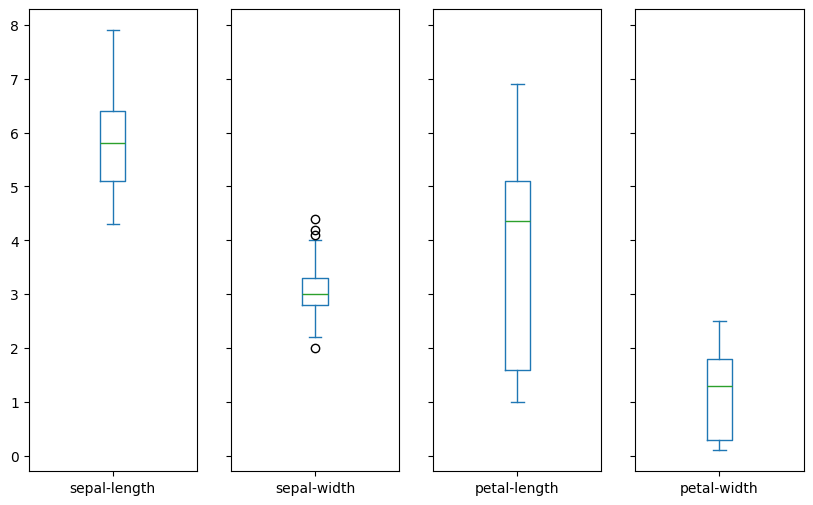

In [13]:
dataset.plot(kind='box', subplots=True, sharey=True, figsize=(10,6))
plt.show()

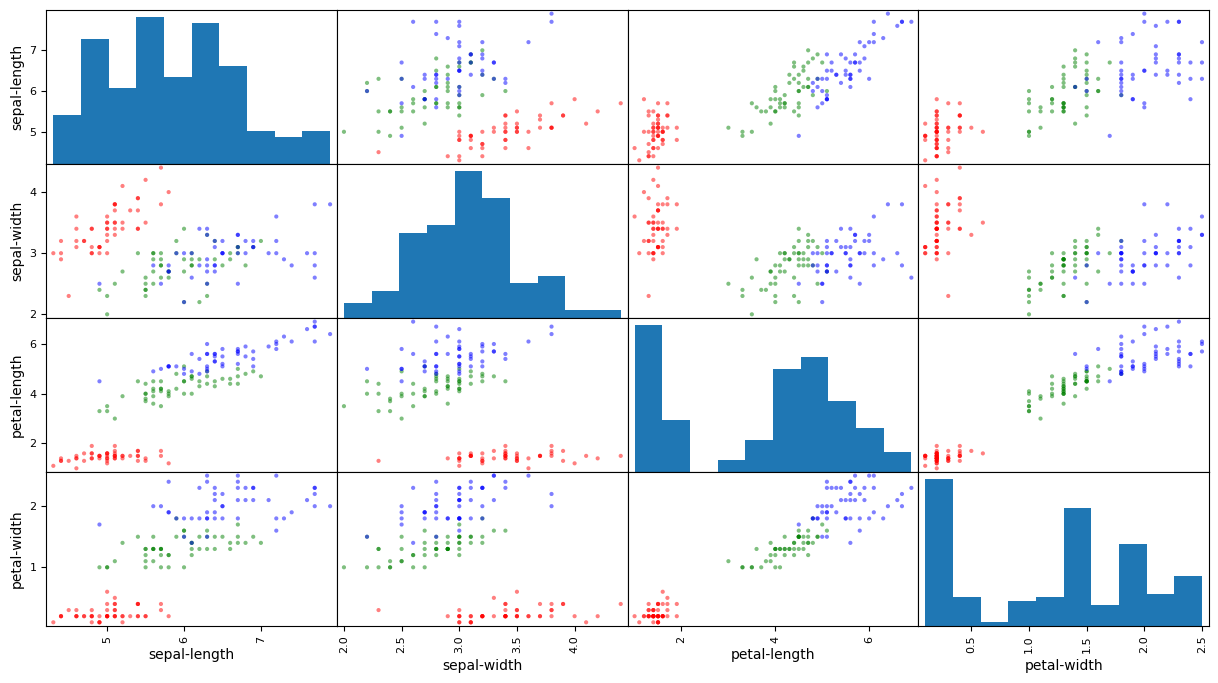

In [14]:
from pandas.plotting import scatter_matrix

color_wheel = {'Iris-setosa': "red", 
               'Iris-versicolor': "green", 
               'Iris-virginica': "blue"}
colors = dataset['class'].map(lambda x: color_wheel.get(x))
scatter_matrix(dataset, figsize=(15,8), diagonal='hist', c=colors)
plt.show()

### Start creating the building blocks

We now need a function to calculate the euclidean distance $ \it D$ between two vectors $ \mathbf{\alpha} = \left[ \alpha_1, \alpha_2, \cdots, \alpha_n \right] $ and $ \mathbf{\beta} = \left[ \beta_1, \beta_2, \cdots, \beta_n \right] $ as

$$
{\it D} = \sqrt{\sum_{i=1}^{n} (\alpha_i - \beta_i)^2}
$$

To calculate the euclidean distance, at least two different approaches are possible: 

1. iteration over the items to sum the squared differences elementwise and then compute the square root
2. use the dot product on the elementwise difference vector


In [15]:
def euclidean_distance(vect1, vect2):
    diff = vect1 - vect2
    edist = np.sqrt(np.dot(diff.T,diff)) 
    return edist

The following cell provides an example on how to use the function with the iris dataset, where the expected result is about `0.538`:

In [16]:
# the first index in iloc selects the row whereas the second one selects the numerical columns
euclidean_distance(np.array(dataset.iloc[0][0:4]),np.array(dataset.iloc[1][0:4]))

0.5385164807134502

The next step is defining a function to select the neighbors for a new data item. The function must create a list, ordered by distance, of the k closest training items. 

In [17]:
# La funzione:
# confronta il punto da classificare con ogni riga del training
# calcola quanto sono “lontani” (distanza euclidea)
# ordina dal più vicino al più lontano
# restituisce i K più vicini
# È il cuore dell’algoritmo KNN.

def get_neighbors(training_list, test_item, k_neighbors):
# training_list: array of items selected as training
# test_item: item to be tested with kNN
# k_neighbors: number of neighbors to consider in classification
    deltas = list()
    # create a list of distances by iterating over all rows in the training set
    for ix, training_item in training_list.iterrows():
        dist = euclidean_distance(np.array(training_item[0:4]),np.array(test_item[0:4]))
        deltas.append([training_item, dist])
    # sort the list in ascending order
    deltas.sort(key=lambda x: x[1])
    
    # select the first k neighbors and return
    neighbors = list()
    for i in range(k_neighbors):
        neighbors.append(deltas[i][0])
    
    return neighbors

Now it's time to make a prediction, based on the <span style="color:red">**most represented class**</span> among the neighbors. The algorithm must select the class labels from the list of neighbors and output the most frequent one.

If two classes have equal occurrences the function must return <span style="color:red">**rejected**</span> therefore we must define a new function to check that only one class has the max number of occurrences.

In [23]:
# La funzione:
# conta quante volte compare ogni classe
# controlla se la classe “item” è l’unica con il numero massimo di voti
# True → è la vincitrice
# False → c’è un pareggio (o non è la prima)

def only_one_max(the_list, item):
    # create a dictionary with class names and the relevant occurrences
    d = dict((x,the_list.count(x)) for x in set(the_list))
    # make a list out of the counts from dictionary values
    llist = list(d.values())
    # create a dictionary of the occurrences of the counts
    dd = dict((x,llist.count(x)) for x in set(llist))
    # returns True if item has only one occurrence
    return dd[d[item]] == 1

The following function returns a class prediction for the current test item or <span style="color:red">**rejected**</span> if two or more classes have the maximum number of occurrences.

In [19]:
def predict(training_list, test_item, k_neighbors):
# training_list: array of items selected as training
# test_item: item to be tested with kNN
# k_neighbors: number of neighbors to consider in classification

    # retrieve the list of neighbors
    neighbors = get_neighbors(training_list, test_item, k_neighbors)
    # create a list of the neighbors' classes and find the most frequent one
    classes = [row[-1] for row in neighbors]
    prediction = max(set(classes), key=classes.count)
    # check if only one class has the max value
    if not only_one_max(classes, prediction):
        prediction = 'Rejected'

    return prediction

### Putting it all together 

You can now load the presets for training and test datasets that are available in the `iris_train.csv` and `iris_test.csv` files respectively. Use the code already presented inside this workbook.

In [20]:
train_ds = pd.read_csv('iris_train.csv', names=col_names)
test_ds = pd.read_csv('iris_test.csv', names=col_names)

The following cell must generate a list of predictions to be compared with the ground truth available in the `class` column of the test dataset. Meanwhile, it is now possible to compute the classification rate, aka **accuracy**, according to the theory. The `results` dataframe contains the number of correctly assigned labels for each **k** value. 

In [21]:
from sklearn.metrics import confusion_matrix 
# see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

kays = [1,2,3,4,5,8]   # list of neighbors to be tested to find the optima solution

res = list()
for k in kays:
    preds = list()
    for i in range(test_ds.index.size):
        p = predict(train_ds,test_ds.iloc[i],k)
        preds.append([p,k])

    predictions = pd.DataFrame(preds, columns=['class','k'])
    correct_count = sum(test_ds['class'] == predictions['class'])
    res.append([k,correct_count,correct_count/test_ds.index.size])
    
    # here we can print the confusion matrix
    cm = confusion_matrix(test_ds['class'],predictions['class'])
    print('Confusion matrix for k = '+str(k)+'\n'+str(cm)+'\n')
    
results = pd.DataFrame(res, columns=['k','correct_values','accuracy'])
results.set_index('k', inplace=True)
print(results)

C:\Users\danil\AppData\Local\Temp\ipykernel_31980\1623037388.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  classes = [row[-1] for row in neighbors]


Confusion matrix for k = 1
[[40  0  0]
 [ 0 34  6]
 [ 0  1 39]]



C:\Users\danil\AppData\Local\Temp\ipykernel_31980\1623037388.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  classes = [row[-1] for row in neighbors]


Confusion matrix for k = 2
[[40  0  0  0]
 [ 0 34  3  3]
 [ 0  1 38  1]
 [ 0  0  0  0]]



C:\Users\danil\AppData\Local\Temp\ipykernel_31980\1623037388.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  classes = [row[-1] for row in neighbors]


Confusion matrix for k = 3
[[40  0  0]
 [ 0 35  5]
 [ 0  1 39]]



C:\Users\danil\AppData\Local\Temp\ipykernel_31980\1623037388.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  classes = [row[-1] for row in neighbors]


Confusion matrix for k = 4
[[40  0  0  0]
 [ 0 29  5  6]
 [ 0  1 39  0]
 [ 0  0  0  0]]



C:\Users\danil\AppData\Local\Temp\ipykernel_31980\1623037388.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  classes = [row[-1] for row in neighbors]


Confusion matrix for k = 5
[[40  0  0]
 [ 0 30 10]
 [ 0  1 39]]



C:\Users\danil\AppData\Local\Temp\ipykernel_31980\1623037388.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  classes = [row[-1] for row in neighbors]


Confusion matrix for k = 8
[[40  0  0  0]
 [ 0 30  6  4]
 [ 0  1 35  4]
 [ 0  0  0  0]]

   correct_values  accuracy
k                          
1             113  0.941667
2             112  0.933333
3             114  0.950000
4             108  0.900000
5             109  0.908333
8             105  0.875000


**Note that if the confusion matrix has 4 rows and columns, the last colums refers to the rejected predictions.**

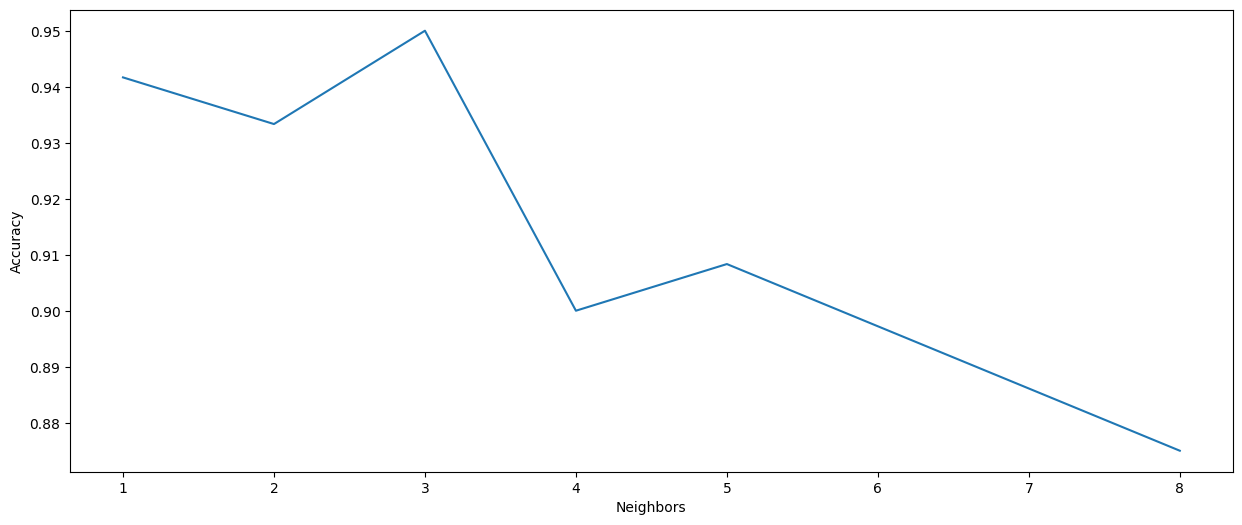

In [22]:
results['accuracy'].plot(subplots=True, figsize=(15, 6))
plt.ylabel('Accuracy')
plt.xlabel('Neighbors')
plt.show()